In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load your dataset
file_path = '/content/drive/MyDrive/Defense help/uzma/depression_dataset.csv'
df = pd.read_csv(file_path)

In [ ]:
# Check the structure of your dataset
df.head()

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


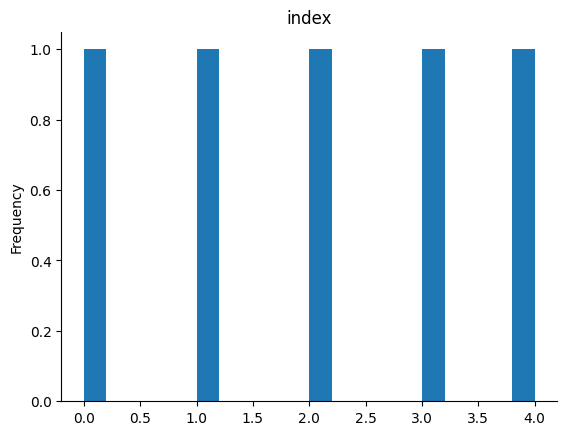

In [ ]:
from matplotlib import pyplot as plt
_df_2['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Preprocess the text data
clean_text = df['clean_text']
is_depression = df['is_depression']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(clean_text, is_depression, test_size=0.3, random_state=42)

In [ ]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [ ]:
# Initialize classifiers
classifiers = [
    LogisticRegression(random_state=42),
    MultinomialNB(),
    SVC(kernel='linear', random_state=42),
    AdaBoostClassifier(random_state=42)
]

classifier_names = [
    'Logistic Regression',
    'Multinomial Naive Bayes',
    'Support Vector Classifier',
    'AdaBoost'
]


Logistic Regression Results:
Accuracy: 0.9560344827586207
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1177
           1       0.97      0.94      0.95      1143

    accuracy                           0.96      2320
   macro avg       0.96      0.96      0.96      2320
weighted avg       0.96      0.96      0.96      2320

Confusion Matrix:
[[1149   28]
 [  74 1069]]


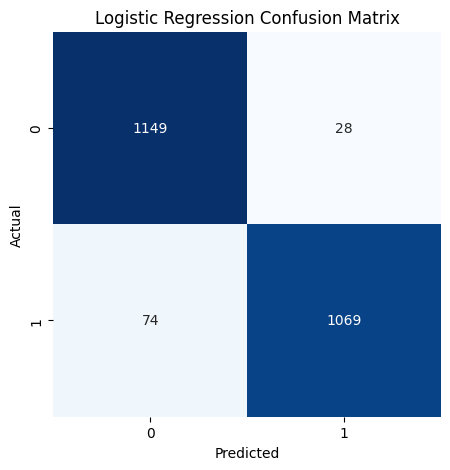

In [ ]:
# Logistic Regression
logistic_clf = LogisticRegression(random_state=42)
logistic_clf.fit(X_train_tfidf, y_train)
logistic_pred = logistic_clf.predict(X_test_tfidf)
logistic_accuracy = accuracy_score(y_test, logistic_pred)
logistic_report = classification_report(y_test, logistic_pred)
logistic_cm = confusion_matrix(y_test, logistic_pred)

print("Logistic Regression Results:")
print(f"Accuracy: {logistic_accuracy}")
print("Classification Report:")
print(logistic_report)
print("Confusion Matrix:")
print(logistic_cm)
plot_confusion_matrix(logistic_cm, 'Logistic Regression Confusion Matrix')
print("\n" + "="*50 + "\n")

Naive Bayes Results:
Accuracy: 0.8663793103448276
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.75      0.85      1177
           1       0.79      0.98      0.88      1143

    accuracy                           0.87      2320
   macro avg       0.89      0.87      0.86      2320
weighted avg       0.89      0.87      0.86      2320

Confusion Matrix:
[[ 885  292]
 [  18 1125]]


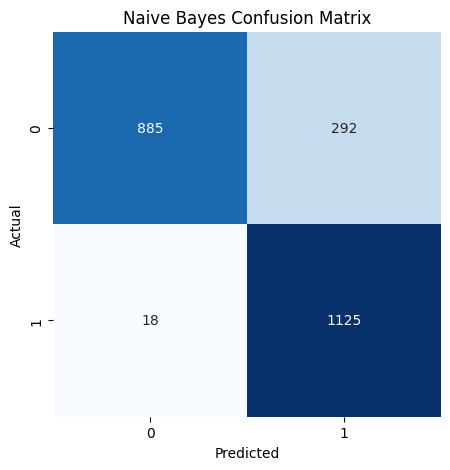

In [ ]:
# Naive Bayes
naive_bayes_clf = MultinomialNB()
naive_bayes_clf.fit(X_train_tfidf, y_train)
naive_bayes_pred = naive_bayes_clf.predict(X_test_tfidf)
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_pred)
naive_bayes_report = classification_report(y_test, naive_bayes_pred)
naive_bayes_cm = confusion_matrix(y_test, naive_bayes_pred)

print("Naive Bayes Results:")
print(f"Accuracy: {naive_bayes_accuracy}")
print("Classification Report:")
print(naive_bayes_report)
print("Confusion Matrix:")
print(naive_bayes_cm)
plot_confusion_matrix(naive_bayes_cm, 'Naive Bayes Confusion Matrix')
print("\n" + "="*50 + "\n")

Support Vector Classifier Results:
Accuracy: 0.959051724137931
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1177
           1       0.97      0.94      0.96      1143

    accuracy                           0.96      2320
   macro avg       0.96      0.96      0.96      2320
weighted avg       0.96      0.96      0.96      2320

Confusion Matrix:
[[1148   29]
 [  66 1077]]


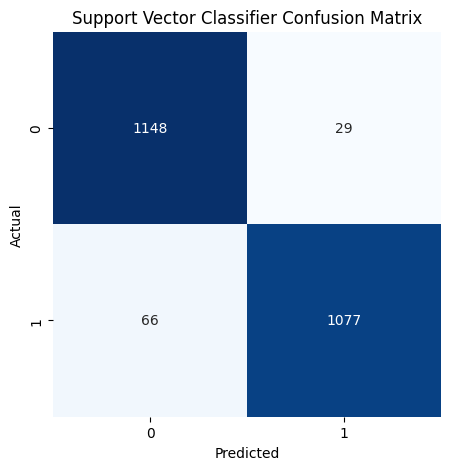

In [ ]:
# Support Vector Classifier
svc_clf = SVC(kernel='linear', random_state=42)
svc_clf.fit(X_train_tfidf, y_train)
svc_pred = svc_clf.predict(X_test_tfidf)
svc_accuracy = accuracy_score(y_test, svc_pred)
svc_report = classification_report(y_test, svc_pred)
svc_cm = confusion_matrix(y_test, svc_pred)

print("Support Vector Classifier Results:")
print(f"Accuracy: {svc_accuracy}")
print("Classification Report:")
print(svc_report)
print("Confusion Matrix:")
print(svc_cm)
plot_confusion_matrix(svc_cm, 'Support Vector Classifier Confusion Matrix')


In [ ]:
# Import AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier
# Add AdaBoost classifier to the list of classifiers
classifiers.append(AdaBoostClassifier(random_state=42))

# Add AdaBoost to the list of classifier names
classifier_names.append('AdaBoost')

AdaBoost Results:
Accuracy: 0.9521551724137931
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1177
           1       0.97      0.93      0.95      1143

    accuracy                           0.95      2320
   macro avg       0.95      0.95      0.95      2320
weighted avg       0.95      0.95      0.95      2320

Confusion Matrix:
[[1145   32]
 [  79 1064]]


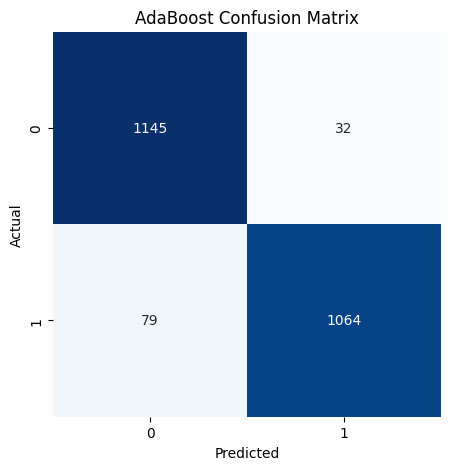

In [ ]:
# Train and evaluate AdaBoost classifier
adaboost_clf = AdaBoostClassifier(random_state=42)
adaboost_clf.fit(X_train_tfidf, y_train)
adaboost_pred = adaboost_clf.predict(X_test_tfidf)
adaboost_accuracy = accuracy_score(y_test, adaboost_pred)
adaboost_report = classification_report(y_test, adaboost_pred)
adaboost_cm = confusion_matrix(y_test, adaboost_pred)

# Print results for AdaBoost
print("AdaBoost Results:")
print(f"Accuracy: {adaboost_accuracy}")
print("Classification Report:")
print(adaboost_report)
print("Confusion Matrix:")
print(adaboost_cm)
plot_confusion_matrix(adaboost_cm, 'AdaBoost Confusion Matrix')


In [ ]:
# Train and evaluate classifiers
accuracies = []

for classifier in classifiers:
    classifier.fit(X_train_tfidf, y_train)
    y_pred = classifier.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Accuracy of {type(classifier).__name__}: {accuracy:.2f}")


Accuracy of LogisticRegression: 0.96
Accuracy of MultinomialNB: 0.87
Accuracy of SVC: 0.96
Accuracy of AdaBoostClassifier: 0.95
Accuracy of AdaBoostClassifier: 0.95


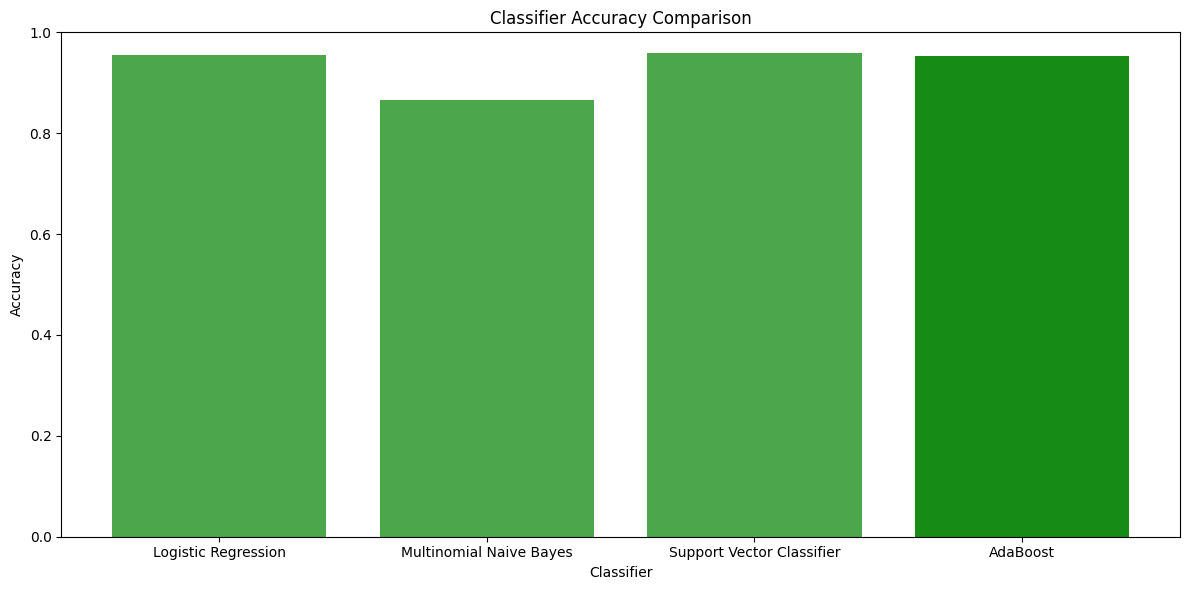

In [ ]:
# Update the visualization of accuracies for all classifiers
plt.figure(figsize=(12, 6))
plt.bar(classifier_names, accuracies, color='green', alpha=0.7)

plt.ylim(0, 1)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy Comparison')
plt.tight_layout()
plt.show()

In [ ]:
# Initialize classifiers
classifiers = [
    LogisticRegression(random_state=42),
    MultinomialNB(),
    SVC(kernel='linear', random_state=42),
    AdaBoostClassifier(random_state=42)
]

classifier_names = [
    'Logistic Regression',
    'Multinomial Naive Bayes',
    'Support Vector Classifier',
    'AdaBoost'
]


In [ ]:
# Input text for testing (modify this as needed)
input_text = ["I feel so overwhelmed by everything in my life right now."]

In [ ]:
# Naive Bayes
naive_bayes_clf = MultinomialNB()
naive_bayes_clf.fit(X_train_tfidf, y_train)

# Make predictions for the input text using Naive Bayes classifier
naive_bayes_result = naive_bayes_clf.predict(tfidf_vectorizer.transform(input_text))


In [ ]:
# Make predictions for the input text using each classifier
naive_bayes_result = naive_bayes_clf.predict(tfidf_vectorizer.transform(input_text))
logistic_regression_result = logistic_clf.predict(tfidf_vectorizer.transform(input_text))
svm_result = svc_clf.predict(tfidf_vectorizer.transform(input_text))
adaboost_result = adaboost_clf.predict(tfidf_vectorizer.transform(input_text))


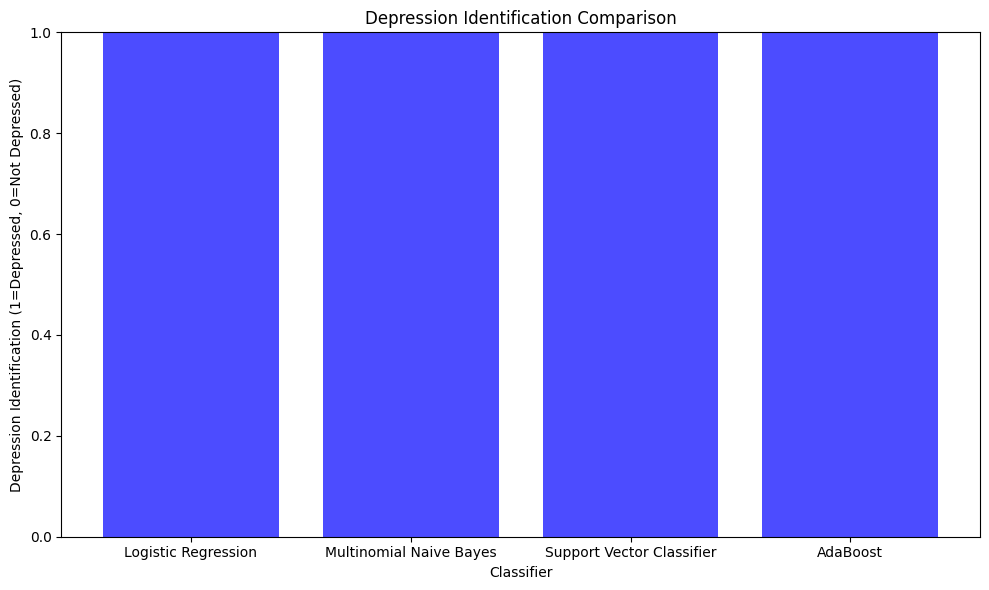

In [ ]:
# Visualize the results for all classifiers
plt.figure(figsize=(10, 6))
results = [naive_bayes_result[0], logistic_regression_result[0], svm_result[0], adaboost_result[0]]
plt.bar(classifier_names, results, color='blue', alpha=0.7)
plt.ylim(0, 1)  # Set the y-axis limit to the range of accuracy (0 to 1)
plt.xlabel('Classifier')
plt.ylabel('Depression Identification (1=Depressed, 0=Not Depressed)')
plt.title('Depression Identification Comparison')
plt.tight_layout()
plt.show()